In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/MyDrive/ /app
!tar -xzvf /app/Colab/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

Mounted at /content/gdrive
cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
chmod: cannot access '/usr/local/cuda/include/cudnn.h#': No such file or directory
chmod: cannot access '檢查是否安裝成功': No such file or directory
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [6]:
!git clone https://github.com/AlexeyAB/darknet
print('每一次執行都要進行一次下載')
%cd darknet
!sed -i "s/GPU=0/GPU=1/g" Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" Makefile# 編譯
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
每一次執行都要進行一次下載
[Errno 20] Not a directory: 'darknet'
/content/darknet
sed: can't read Makefile#: No such file or directory
sed: can't read 編譯: No such file or directory
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, 

In [7]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/darknet53.conv.74
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

--2021-10-18 11:58:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  56.6MB/s    in 4.4s    

2021-10-18 11:58:48 (54.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2021-10-18 11:58:48--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  56.8MB/s    in 2.7s    

2021-10-18 11:58:51 (56.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]

--2021-

In [8]:
print('圖檔顯示函數')
import cv2
import matplotlib.pyplot as plt
def imShow(path):
  image=cv2.imread(path)
  print(image.__class__)
  height,width=image.shape[:2]
  print(height)
  print(width)
  resize_image=cv2.resize(image,(3*width,3*height),
              interpolation=cv2.INTER_CUBIC)
  fig=plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(resize_image,cv2.COLOR_BGR2RGB))
  plt.show()

圖檔顯示函數


 CUDA-version: 11010 (11020), cuDNN: 7.5.0, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

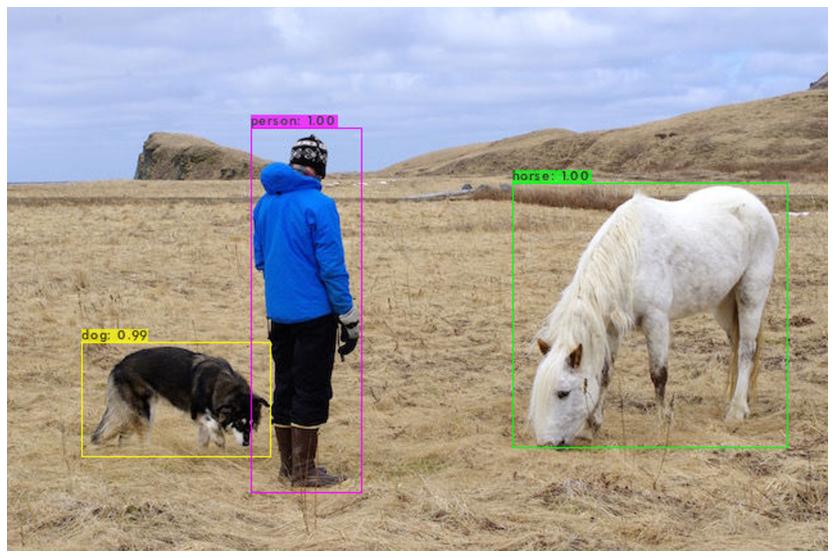

In [9]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.5.0, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

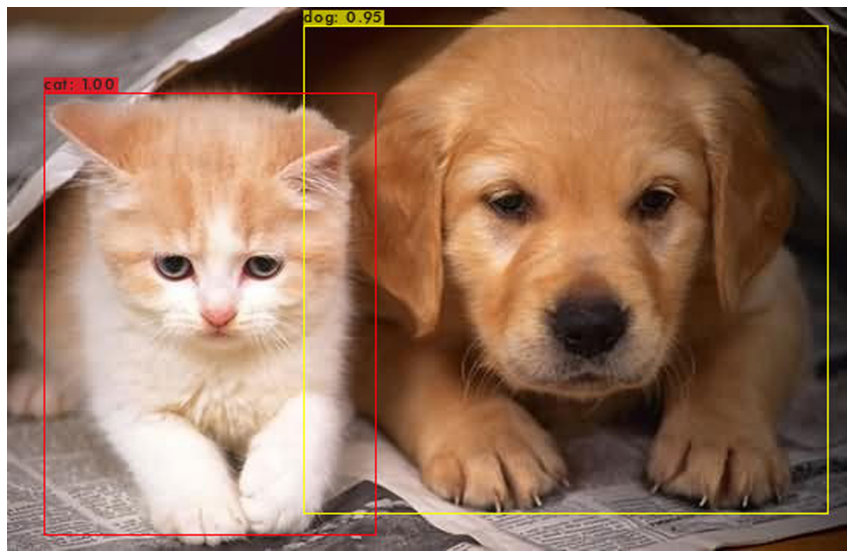

In [10]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/833035.jpg
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.5.0, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv 

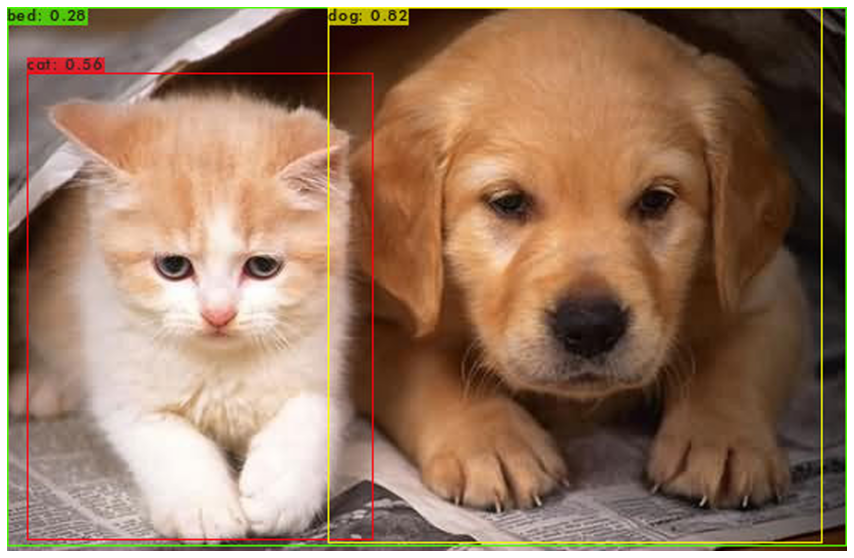

In [11]:
! ./darknet detect cfg/yolov4.cfg yolov4.weights data/833035.jpg
imShow('predictions.jpg')